In [1]:
x=1

In [2]:
import scanpy as sc
import pandas as pd
import decoupler as dc

In [3]:
adata = sc.read('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/snakemake/hlca/5fold/hlca_hyperparam/data/pp/hlca_hvg_pearson.h5ad')
adata

AnnData object with n_obs × n_vars = 2149684 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_l

In [4]:
ct = pd.read_csv('/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/hlca/celltypes.csv', index_col=0)
ct

,l1_celltype,l2_celltype,l3_celltype,l4_celltype,l5_celltype
CGATGTAAGTTACGGG_SC10,Immune,Myeloid,Macrophages,Alveolar macrophages,None
ATTCTACCAAGGTTCT_HD68,Endothelial,Blood vessels,EC capillary,EC aerocyte capillary,None
P1_2_TGCTGCTAGCTCCTCT,Immune,Myeloid,Macrophages,Alveolar macrophages,None
CTGATAGTCTTAGAGC_F01367,Endothelial,Blood vessels,EC arterial,None,None
D344_Brus_Dis1_CATTCGCGTGCCTGCA-1-14,Epithelial,Airway epithelium,Secretory,Club,Club (non-nasal)
...,...,...,...,...,...
SC25_CGTGTCTTCTGCAGTA_reyfman_disease,Immune,Myeloid,Macrophages,Alveolar macrophages,4_Alveolar macrophages
TTGTGGATCGTTCCTG_5-PX5-sub_mould,Immune,Myeloid,Macrophages,Alveolar macrophages,4_Alveolar macrophages
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl,Immune,Myeloid,Macrophages,Alveolar macrophages,4_Alveolar macrophages
022C-b_GGATGTTTCCAAGTAC_adams,Immune,Myeloid,Macrophages,Alveolar macrophages,4_Alveolar macrophages


In [5]:
adata.obs = adata.obs.join(ct)
adata

AnnData object with n_obs × n_vars = 2149684 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_l

In [6]:
adata.X.data

array([1., 5., 1., ..., 1., 2., 3.], dtype=float32)

In [7]:
DONOR = 'sample'
CONDITION = 'lung_condition_coarse'
CELLTYPE = 'l2_celltype'
n_splits = 5

In [8]:
adata.obs[CELLTYPE].value_counts(dropna=False)

Myeloid                     775440
Airway epithelium           487711
Lymphoid                    368107
Alveolar epithelium         200702
Fibroblast lineage          141927
Blood vessels               139283
Lymphatic EC                 15521
Submucosal Gland             11548
Smooth muscle                 9155
Mesothelium                    230
Hematopoietic stem cells        60
Name: l2_celltype, dtype: int64

In [9]:
adata.obs[CELLTYPE] = adata.obs[CELLTYPE].astype('category')

# Create pseudobulks

In [10]:
all_cts = set(adata.obs[CELLTYPE].cat.categories)

In [11]:
all_cts_sorted = sorted(list(all_cts))

In [12]:
adata.obs[CELLTYPE].values

['Myeloid', 'Airway epithelium', 'Blood vessels', 'Fibroblast lineage', 'Myeloid', ..., 'Myeloid', 'Airway epithelium', 'Myeloid', 'Myeloid', 'Myeloid']
Length: 2149684
Categories (11, object): ['Airway epithelium', 'Alveolar epithelium', 'Blood vessels', 'Fibroblast lineage', ..., 'Mesothelium', 'Myeloid', 'Smooth muscle', 'Submucosal Gland']

In [13]:
# Get pseudo-bulk profile
adata_ = dc.get_pseudobulk(adata, sample_col=DONOR, groups_col=CELLTYPE, layer=None, min_prop=-1, min_smpls=0, min_cells=0, min_counts=0)
adata_

View of AnnData object with n_obs × n_vars = 4483 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'lung_condition', 'mixed_ancestry', 'sample', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'transf_ann_level_2_label', 'lung_condition_coarse', 'split0', 'split1', 'split2', 'split3', 'split4', 'l2_celltype', 'psbulk_n_cells', 'psbulk_counts'
    var: 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    layers: 'psbulk_props'

In [14]:
sc.pp.normalize_total(adata_, target_sum=1e4)
sc.pp.log1p(adata_)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [15]:
adata_.obs[DONOR] = adata_.obs[DONOR].astype('category')
adata_.obs[CELLTYPE] = adata_.obs[CELLTYPE].astype('category')

In [16]:
adata_

AnnData object with n_obs × n_vars = 4483 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'lung_condition', 'mixed_ancestry', 'sample', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'transf_ann_level_2_label', 'lung_condition_coarse', 'split0', 'split1', 'split2', 'split3', 'split4', 'l2_celltype', 'psbulk_n_cells', 'psbulk_counts'
    var: 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'log1p'
    layers: 'psbulk_props'

In [17]:
df = {}
for donor in adata_.obs[DONOR].cat.categories:
    df[donor] = {}
    for ct in adata_.obs[CELLTYPE].cat.categories:
        tmp = adata_[adata_.obs[DONOR] == donor].copy()
        tmp = tmp[tmp.obs[CELLTYPE] == ct].copy()
        if len(tmp) > 0:
            df[donor][ct] = tmp.X[0]

In [18]:
missing_columns = {}
for donor in df.keys():
    df[donor] = pd.DataFrame(df[donor])
    missing_columns[donor] = list(all_cts.difference(set(df[donor].columns)))
    df[donor][[missing_columns[donor]]] = 0.0
    df[donor] = df[donor][all_cts_sorted]
    df[donor] = df[donor].T.stack().values

In [19]:
df = pd.DataFrame(df)
df = df.reindex(sorted(df.columns), axis=1)
df = df.T
df

,0,1,2,3,4,5,6,7,8,9,...,21990,21991,21992,21993,21994,21995,21996,21997,21998,21999
001C,1.735937,0.113197,0.840867,0.985045,0.939257,0.000000,0.000000,0.891272,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
002C,1.383103,0.153544,0.000000,0.404048,2.211782,0.000000,0.000000,2.363266,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
003C,1.230717,0.258952,0.387243,1.281219,2.105589,0.000000,0.000000,2.091087,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
010I,1.195333,0.104979,0.470548,1.138735,1.715936,0.034960,0.003945,1.576597,0.034960,0.003945,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
021I,1.150075,0.067915,0.549774,1.649894,1.466264,0.086501,0.000000,1.440447,0.067915,0.029673,...,0.0,2.354503,0.0,0.0,0.0,1.218829,0.0,1.752056,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scrBT1428,0.833320,0.516703,0.713320,1.125420,1.825159,0.050729,0.000000,1.850012,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
scrBT1429,0.757894,0.554641,0.716162,0.627080,1.850600,0.391822,0.000000,1.654385,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
scrBT1430,0.928577,0.114097,1.544635,0.114097,0.019943,0.000000,0.000000,0.485168,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
scrBT1431,0.583306,0.423940,0.583306,0.000000,1.956093,0.000000,0.000000,1.878499,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [20]:
adata_ = sc.AnnData(df)
adata_

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 709 × 22000

In [21]:
obs_to_keep = [DONOR, CONDITION]
obs_to_keep.extend([f'split{i}' for i in range(n_splits)])
obs_to_keep

['sample',
 'lung_condition_coarse',
 'split0',
 'split1',
 'split2',
 'split3',
 'split4']

In [22]:
obs = adata.obs[obs_to_keep].drop_duplicates().sort_values(DONOR).set_index(DONOR)

In [23]:
adata_.obs = adata_.obs.join(obs)

In [24]:
adata_

AnnData object with n_obs × n_vars = 709 × 22000
    obs: 'lung_condition_coarse', 'split0', 'split1', 'split2', 'split3', 'split4'

# Multiclass regression

In [25]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from scipy.special import logsumexp

In [26]:
def loss(X, Y, W):
    """
    Y: onehot encoded
    """
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(logsumexp(Z, axis=1)))
    return loss

def gradient(X, Y, W, mu):
    """
    Y: onehot encoded 
    """
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=2000, eta=0.1, mu=0.01):
    """
    Very basic gradient descent algorithm with fixed eta and mu
    """
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)

In [27]:
val_accuracies = []
for i in range(n_splits):
    print(f'Processing split = {i}...')
    df = adata.obs[[f'split{i}', DONOR]].drop_duplicates()
    train = list(df[df[f'split{i}'] == 'train'][DONOR])
    val = list(df[df[f'split{i}'] == 'val'][DONOR])
    # train data
    x = pd.DataFrame(adata_[adata_.obs_names.isin(train)].X).to_numpy()
    num_of_classes = len(adata_.obs[CONDITION].cat.categories)
    y = adata_[adata_.obs_names.isin(train)].obs[CONDITION].cat.rename_categories(list(range(num_of_classes)))
    y = y.to_numpy()
    print("Train shapes:")
    print(f"x.shape = {x.shape}")
    print(f"y.shape = {y.shape}")
    # val data
    x_val = pd.DataFrame(adata_[adata_.obs_names.isin(val)].X).to_numpy()
    y_val = adata_[adata_.obs_names.isin(val)].obs[CONDITION].cat.rename_categories(list(range(num_of_classes)))
    y_val = y_val.to_numpy()
    print("Val shapes:")
    print(f"x_val.shape = {x_val.shape}")
    print(f"y_val.shape = {y_val.shape}")
    # fit
    X = x
    Y = y
    model = Multiclass()
    model.fit(X, Y)
    print(f'Train accuracy = {np.sum(model.predict(X) == Y)/len(Y)}.')
    val_accuracy = np.sum(model.predict(x_val) == y_val)/len(y_val)
    val_accuracies.append(val_accuracy)
    print(f'Val accuracy = {val_accuracy}.')
    print('===========================')

print(f"Mean validation accuracy across 5 CV splits for a multiclass regression model = {np.mean(np.array(val_accuracies))}.")

Processing split = 0...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 1.0.
Val accuracy = 0.8732394366197183.
Processing split = 1...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 1.0.
Val accuracy = 0.8591549295774648.
Processing split = 2...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 1.0.
Val accuracy = 0.8591549295774648.
Processing split = 3...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 1.0.
Val accuracy = 0.8732394366197183.
Processing split = 4...
Train shapes:
x.shape = (568, 22000)
y.shape = (568,)
Val shapes:
x_val.shape = (141, 22000)
y_val.shape = (141,)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train accuracy = 1.0.
Val accuracy = 0.8723404255319149.
Mean validation accuracy across 5 CV splits for a multiclass regression model = 0.8674258315852562.


# NN

In [28]:
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from random import sample
import math

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [29]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [30]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 128)
        self.layer_out = nn.Linear(128, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(128)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_out(x)
        
        return x

In [31]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [32]:
EPOCHS = 300
BATCH_SIZE = 16
LEARNING_RATE = 0.000001
NUM_FEATURES = adata_.shape[1]
NUM_CLASSES = len(adata_.obs[CONDITION].cat.categories)
TRAIN_FRACTION = 0.8

Processing split = 0...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)
Begin training.


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 300: | Train Loss: 0.42058 | Val Loss: 0.94629 | Train Acc: 100.000| Val Acc: 82.301
Accuracy on the test set = 0.8169014084507042.
Processing split = 1...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)
Begin training.


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 300: | Train Loss: 0.34220 | Val Loss: 0.87329 | Train Acc: 100.000| Val Acc: 86.726
Accuracy on the test set = 0.8380281690140845.
Processing split = 2...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)
Begin training.


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 300: | Train Loss: 0.36752 | Val Loss: 0.91078 | Train Acc: 100.000| Val Acc: 89.381
Accuracy on the test set = 0.8943661971830986.
Processing split = 3...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)
Begin training.


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 300: | Train Loss: 0.28294 | Val Loss: 0.72445 | Train Acc: 100.000| Val Acc: 90.265
Accuracy on the test set = 0.8943661971830986.
Processing split = 4...
Train shapes:
x.shape = (568, 22000)
y.shape = (568,)
Val shapes:
x_val.shape = (141, 22000)
y_val.shape = (141,)
Begin training.


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 300: | Train Loss: 0.33881 | Val Loss: 0.74810 | Train Acc: 100.000| Val Acc: 91.150


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

Accuracy on the test set = 0.851063829787234.
Mean validation accuracy across 5 CV splits for a NN model = 0.8589451603236441.


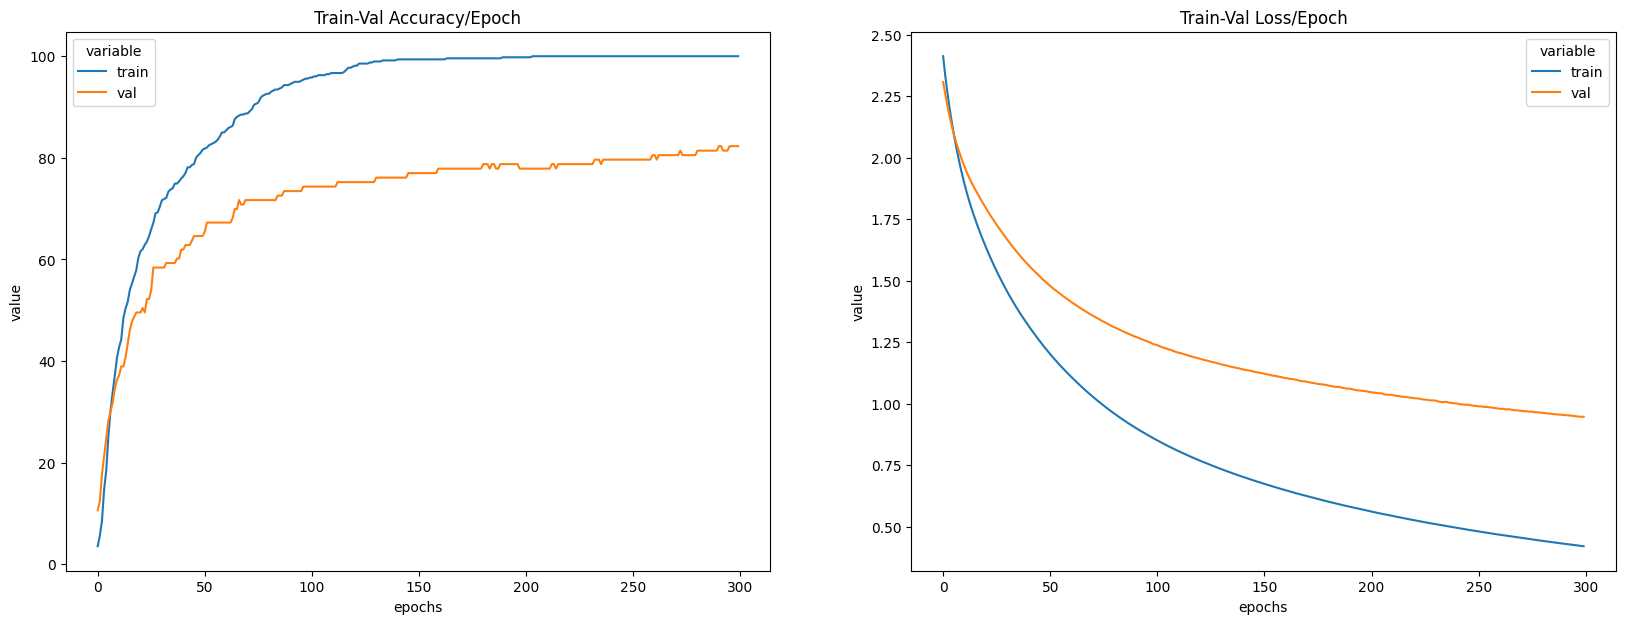

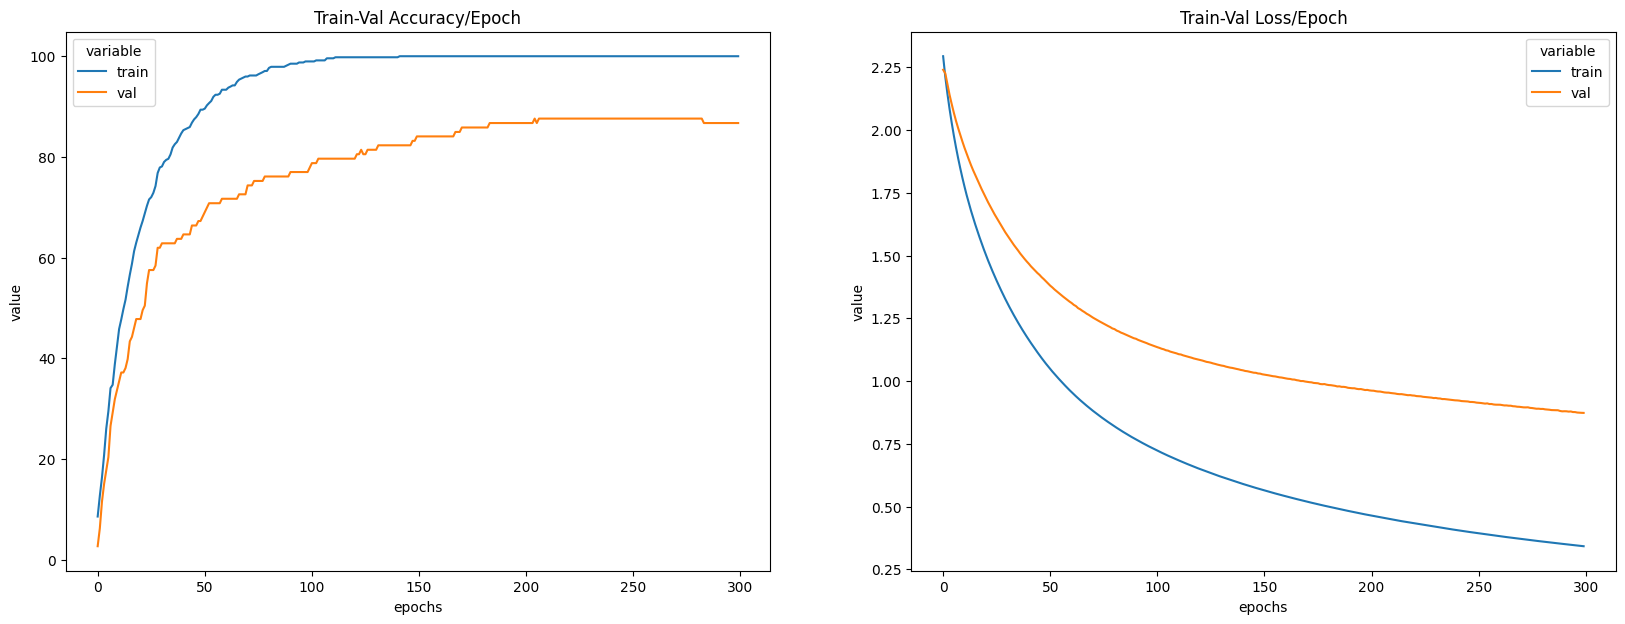

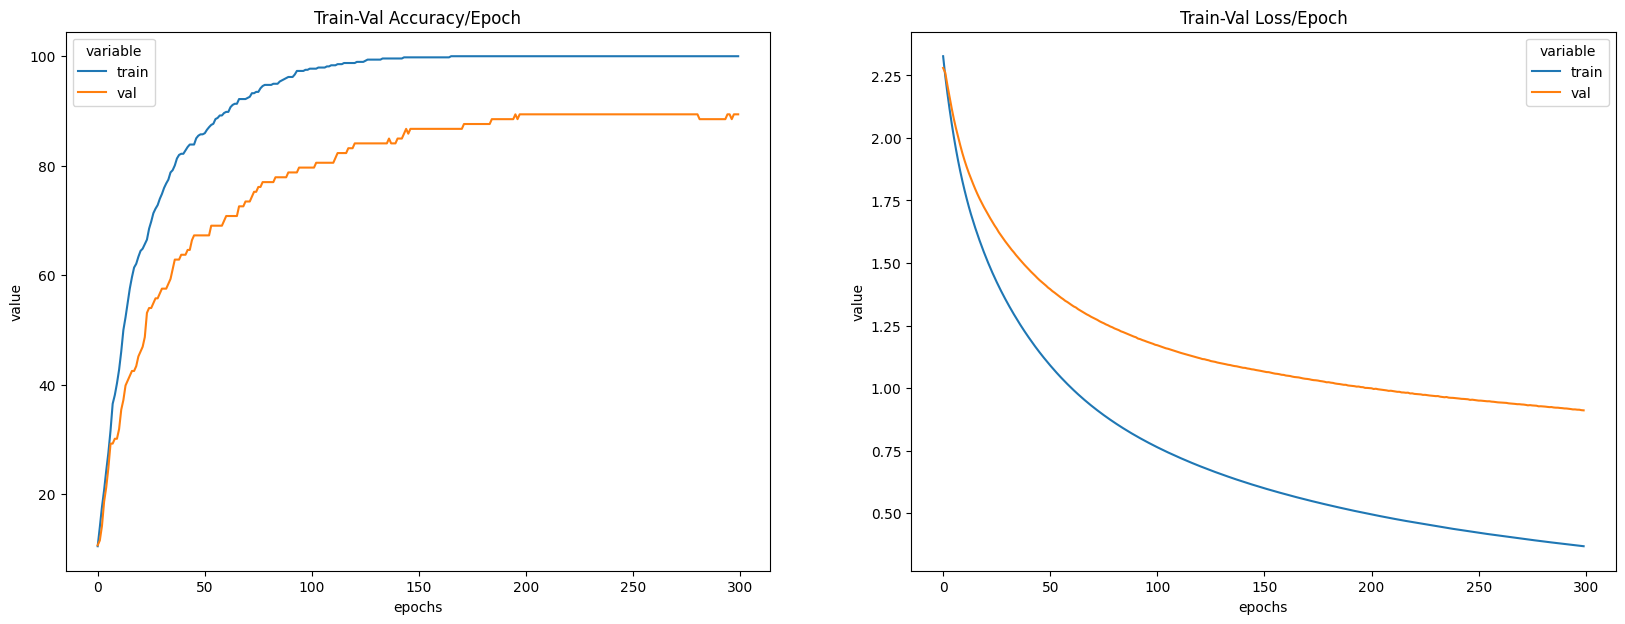

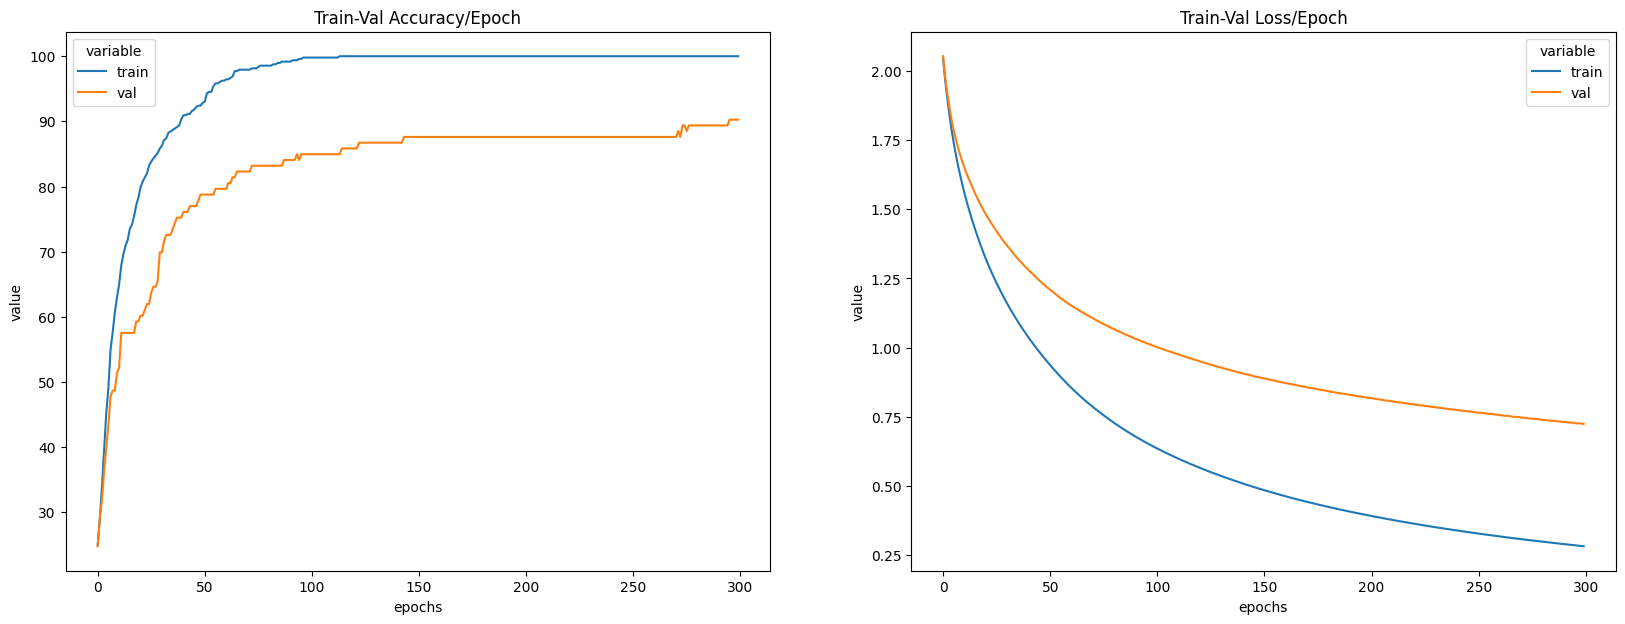

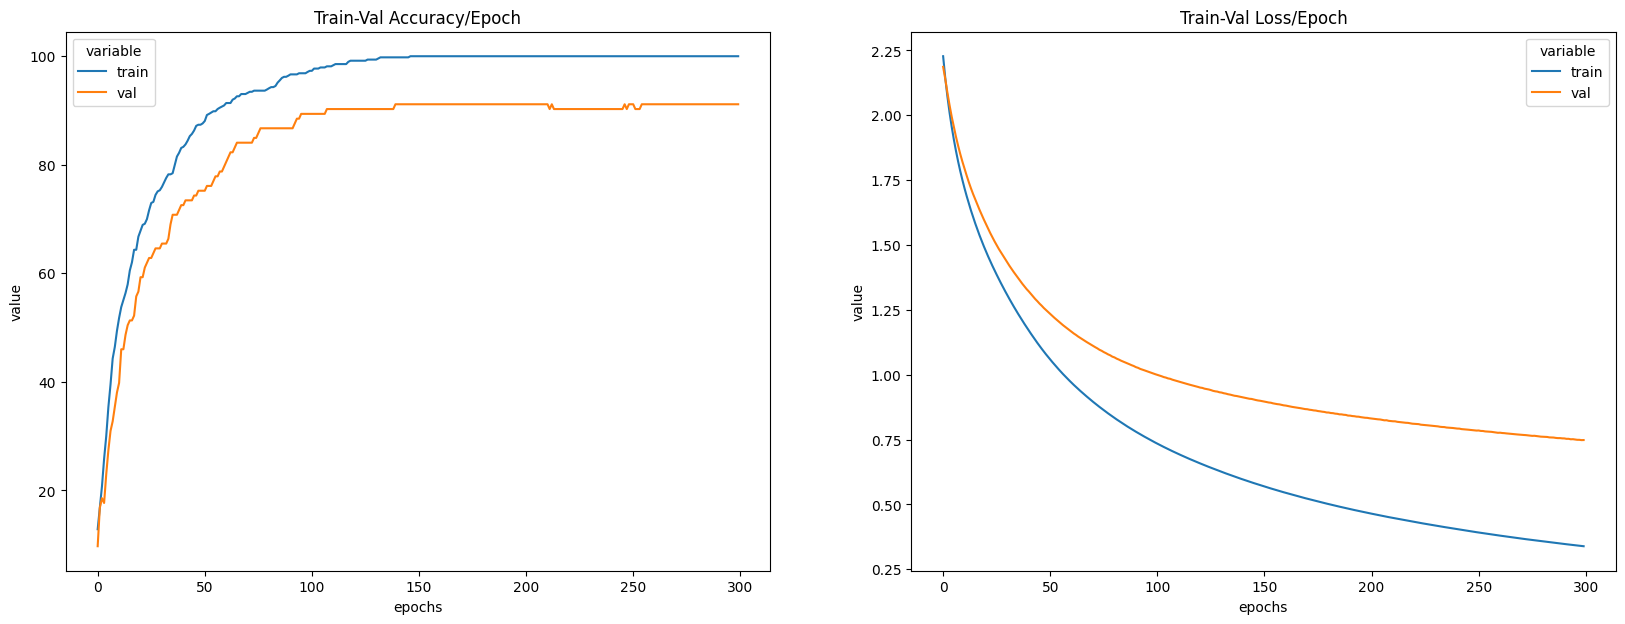

In [33]:
val_accuracies = []
for i in range(n_splits):
    print(f'Processing split = {i}...')
    df = adata.obs[[f'split{i}', DONOR]].drop_duplicates()
    train = list(df[df[f'split{i}'] == 'train'][DONOR])
    val = list(df[df[f'split{i}'] == 'val'][DONOR])
    # train data
    x = pd.DataFrame(adata_[adata_.obs_names.isin(train)].X).to_numpy()
    num_of_classes = len(adata_.obs[CONDITION].cat.categories)
    y = adata_[adata_.obs_names.isin(train)].obs[CONDITION].cat.rename_categories(list(range(num_of_classes)))
    y = y.to_numpy()
    print("Train shapes:")
    print(f"x.shape = {x.shape}")
    print(f"y.shape = {y.shape}")
    # val data, later this is called test data because the val data is subset of train
    x_val = pd.DataFrame(adata_[adata_.obs_names.isin(val)].X).to_numpy()
    y_val = adata_[adata_.obs_names.isin(val)].obs[CONDITION].cat.rename_categories(list(range(num_of_classes)))
    y_val = y_val.to_numpy()
    print("Val shapes:")
    print(f"x_val.shape = {x_val.shape}")
    print(f"y_val.shape = {y_val.shape}")
    # fit
    X = x
    Y = y
    n_of_train_samples = int(math.ceil(len(y) * TRAIN_FRACTION))
    train_samples = sample(range(len(y)), n_of_train_samples)
    val_samples = [i for i in range(len(y)) if i not in train_samples]
    X_test = x_val
    y_test = y_val
    X_train = x[train_samples]
    y_train = y[train_samples]
    X_val = x[val_samples]
    y_val = y[val_samples]
    
    # create datasets
    train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
    val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
    test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())
    
    # create loaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE)
    val_loader = DataLoader(dataset=val_dataset, batch_size=1)
    test_loader = DataLoader(dataset=test_dataset, batch_size=1)
    
    # init model
    model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
    # define loss
    criterion = nn.CrossEntropyLoss()
    # define optimizer
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # loss recoder
    accuracy_stats = {
        'train': [],
        "val": []
    }
    loss_stats = {
        'train': [],
        "val": []
    }
    
    # train
    print("Begin training.")
    for e in tqdm(range(1, EPOCHS+1)):

        # TRAINING
        train_epoch_loss = 0
        train_epoch_acc = 0
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch, y_train_batch
            optimizer.zero_grad()

            y_train_pred = model(X_train_batch)

            train_loss = criterion(y_train_pred, y_train_batch)
            train_acc = multi_acc(y_train_pred, y_train_batch)

            train_loss.backward()
            optimizer.step()

            train_epoch_loss += train_loss.item()
            train_epoch_acc += train_acc.item()


        # VALIDATION    
        with torch.no_grad():

            val_epoch_loss = 0
            val_epoch_acc = 0

            model.eval()
            for X_val_batch, y_val_batch in val_loader:
                X_val_batch, y_val_batch = X_val_batch, y_val_batch

                y_val_pred = model(X_val_batch)

                val_loss = criterion(y_val_pred, y_val_batch)
                val_acc = multi_acc(y_val_pred, y_val_batch)

                val_epoch_loss += val_loss.item()
                val_epoch_acc += val_acc.item()

        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))
        accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
        accuracy_stats['val'].append(val_epoch_acc/len(val_loader))


    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')
    
    # losses
    # Create dataframes
    train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
    # Plot the dataframes
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
    sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')
    
    # predict
    y_pred_list = []
    with torch.no_grad():
        model.eval()
        for X_batch, _ in test_loader:
            X_batch = X_batch
            y_test_pred = model(X_batch)
            _, y_pred_tags = torch.max(y_test_pred, dim = 1)
            y_pred_list.append(y_pred_tags.cpu().numpy())
    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    
    df = classification_report(y_test, y_pred_list, output_dict=True)
    val_accuracies.append(df['accuracy'])
    print(f'Accuracy on the test set = {df["accuracy"]}.')
    print('===========================')
    
print(f"Mean validation accuracy across 5 CV splits for a NN model = {np.mean(np.array(val_accuracies))}.")

# Random forest

Adjusted from https://www.datacamp.com/tutorial/random-forests-classifier-python.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
val_accuracies = []
for i in range(5):
    print(f'Processing split = {i}...')
    df = adata.obs[[f'split{i}', DONOR]].drop_duplicates()
    train = list(df[df[f'split{i}'] == 'train'][DONOR])
    val = list(df[df[f'split{i}'] == 'val'][DONOR])
    # train data
    x = pd.DataFrame(adata_[adata_.obs_names.isin(train)].X).to_numpy()
    num_of_classes = len(adata_.obs[CONDITION].cat.categories)
    y = adata_[adata_.obs_names.isin(train)].obs[CONDITION].cat.rename_categories(list(range(num_of_classes)))
    y = y.to_numpy()
    print("Train shapes:")
    print(f"x.shape = {x.shape}")
    print(f"y.shape = {y.shape}")
    # val data
    x_val = pd.DataFrame(adata_[adata_.obs_names.isin(val)].X).to_numpy()
    y_val = adata_[adata_.obs_names.isin(val)].obs[CONDITION].cat.rename_categories(list(range(num_of_classes)))
    y_val = y_val.to_numpy()
    print("Val shapes:")
    print(f"x_val.shape = {x_val.shape}")
    print(f"y_val.shape = {y_val.shape}")
    # fit
    X = x
    Y = y
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X, Y)
    print(f'Train accuracy = {np.sum(clf.predict(X) == Y)/len(Y)}.')
    y_pred = clf.predict(x_val)
    val_accuracy = np.sum(clf.predict(x_val) == y_val)/len(y_val)
    val_accuracies.append(val_accuracy)
    print(f'Val accuracy = {val_accuracy}.')
    print('===========================')

print(f"Mean validation accuracy across 5 CV splits for a random forest model = {np.mean(np.array(val_accuracies))}.")

Processing split = 0...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)
Train accuracy = 1.0.
Val accuracy = 0.823943661971831.
Processing split = 1...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)
Train accuracy = 1.0.
Val accuracy = 0.8450704225352113.
Processing split = 2...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)
Train accuracy = 1.0.
Val accuracy = 0.795774647887324.
Processing split = 3...
Train shapes:
x.shape = (567, 22000)
y.shape = (567,)
Val shapes:
x_val.shape = (142, 22000)
y_val.shape = (142,)
Train accuracy = 1.0.
Val accuracy = 0.8098591549295775.
Processing split = 4...
Train shapes:
x.shape = (568, 22000)
y.shape = (568,)
Val shapes:
x_val.shape = (141, 22000)
y_val.shape = (141,)
Train accuracy = 1.0.
Val accuracy = 0.7801418439716312.
Mean validation accuracy ac